# CEO-Request Challenge

## 1. Problem statement (summarized)

>❓ How should Olist improve its profit margin ❓, given that it has 
> - some revenues per sellers per months
> - some revenues per orders
> - some reputation costs (estimated) per bad reviews
> - some operational costs of IT system that grows with number of orders, but not linearly (scale effects)


Let's recap our key findings so far :
- We have seen that `wait_time` was the most significant factor behind low review scores, but reading comments of the bad reviews also showed that some of them were linked to the seller or to the product itself.
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`. The latter being outside of Olist's direct control, improving it is not a quick-win recommendation we can make to Olist CEO without in-depth analysis of their operational practices.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.

👉 We recommend you to start with the the seller analysis 1.1) below, but feel free to investigate into other hypothesis instead 1.2)

### 1.1 (recommended) **Should Olist remove underperforming sellers from its marketplace ?** 🕵🏻

To analyse the impact of removing the worse sellers from Olist's marketplace, we will perform a what-if analysis: What would have happened if Olist had never accepted these sellers in the first place? (granted, it's hard to know in advance who is a good seller, but let's start with this and iterate later).

1️⃣ Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)
- the number of `orders` (it will impact the overall IT costs)


2️⃣ We can then:
- sort sellers by increasing profits for Olist
- for each number of sellers to remove, compute the financial impact it would have made if they had never been accepted on the platform. 
- we may find an optimal number of sellers to remove that maximizes Olist's profit margin

👉 Write down a detailed strategy (step by step) to create the DataFrame you need for the first step.

<br>

<details>
    <summary> <i>💡 Think about how to re-use or update the logic you've already coded in your 🗂 `olist` package</i> </summary>


Starting from your current `seller().get_training_data()` DataFrame, can you easily transform it to compute:
- Olist's positive `revenue_per_seller`? 
- Olist's `cost_of_bad_reviews`?

You will orally present your insights to your favorite TA at the end of this unit `Communicate` "
</details>


### 1.2 (optional): Here are other hypothesis you may want to investigate instead

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## PnL Analysis >>> Revenues & Costs >>> Seller Selection

### What are the revenues per seller, and the profits all time (per seller) ###

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [98]:
from olist.seller import Seller
seller = Seller()
sellers = seller.get_training_data()

> Compute the revenues stream

In [99]:
sellers['rev1'] = 0.1 * sellers['sales']
sellers['rev2'] = 80 * sellers['months_on_olist']
sellers['rev'] = sellers['rev1'] + sellers['rev2']
sellers[['seller_id', 'rev1', 'rev2', 'rev']].round()

,seller_id,rev1,rev2,rev
0,3442f8959a84dea7ee197c632cb2df15,22.0,320.0,342.0
1,d1b65fc7debc3361ea86b5f14c68d2e2,1170.0,1120.0,2290.0
2,ce3ad9de960102d0677a81f5d0bb7b2d,16.0,0.0,16.0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,8.0,0.0,8.0
4,51a04a8a6bdcb23deccc82b0b80742cf,17.0,0.0,17.0
...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,16.0,0.0,16.0
2963,f8201cab383e484733266d1906e2fdfa,89.0,1120.0,1209.0
2964,74871d19219c7d518d0090283e03c137,55.0,400.0,455.0
2965,e603cf3fec55f8697c9059638d6c8eb5,30.0,320.0,350.0


>> What is the distribution of revenues over sellers ?

<AxesSubplot:ylabel='Frequency'>

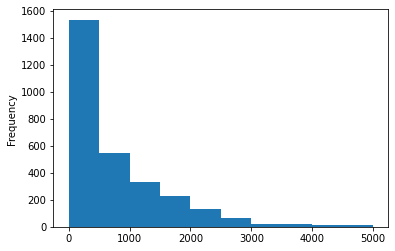

In [100]:
sellers['rev'].sort_values().plot.hist(range = (0, 5000))

>> What is the cost distribution over sellers

In [101]:
#compute the costs streams, based on share of bad stars
sellers['cost_1'] = 100 * sellers['n_orders'] * sellers['share_of_one_stars']
sellers['cost_2'] = 50 * sellers['n_orders'] * sellers['share_of_two_stars']
sellers['cost_3'] = 40 * sellers['n_orders'] * sellers['share_of_three_stars']

#cost of bad reviews
sellers['cost_br'] = sellers['cost_1'] + sellers['cost_2'] + sellers['cost_3']

#show
sellers[['seller_id', 'cost_1', 'cost_2', 'cost_3', 'cost_br']]

,seller_id,cost_1,cost_2,cost_3,cost_br
0,3442f8959a84dea7ee197c632cb2df15,100.0,0.0,40.0,140.0
1,d1b65fc7debc3361ea86b5f14c68d2e2,200.0,0.0,40.0,240.0
2,ce3ad9de960102d0677a81f5d0bb7b2d,0.0,0.0,0.0,0.0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,0.0,0.0,0.0,0.0
4,51a04a8a6bdcb23deccc82b0b80742cf,100.0,0.0,0.0,100.0
...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,0.0,0.0,0.0,0.0
2963,f8201cab383e484733266d1906e2fdfa,100.0,0.0,40.0,140.0
2964,74871d19219c7d518d0090283e03c137,0.0,0.0,0.0,0.0
2965,e603cf3fec55f8697c9059638d6c8eb5,0.0,50.0,0.0,50.0


<AxesSubplot:ylabel='Frequency'>

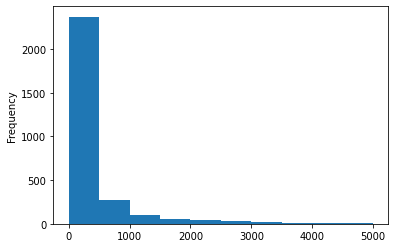

In [102]:
sellers.cost_br.plot.hist(range=(0, 5000))

>> How do the profits look like ?

In [103]:
# compute the profits
sellers['profits'] = sellers['rev'] - sellers['cost_br']

#show
sellers[['profits']].describe().round()

,profits
count,2967.0
mean,392.0
std,1249.0
min,-21711.0
25%,21.0
50%,254.0
75%,689.0
max,18039.0


>> What is the profits distribution over sellers

<AxesSubplot:ylabel='Frequency'>

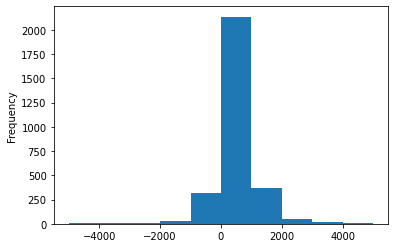

In [104]:
sellers.profits.plot.hist(range=(-5000, 5000))

>> What if we cut those dealers which negative profit
>>> First we need to discount the IT-related costs

In [105]:
#define a new table called new_sellers and sort by profits

new_sellers = sellers[['seller_id', 'rev', 'cost_br', 'profits', 'n_orders']]
new_sellers = new_sellers.sort_values(by=['profits']).round()
new_sellers

,seller_id,rev,cost_br,profits,n_orders
769,6560211a19b47992c3666cc44a7e94c0,13770.0,35481.0,-21711.0,1854
2358,4a3ca9315b744ce9f8e9374361493884,21647.0,39509.0,-17862.0,1806
1357,cc419e0650a3c5ba77189a1882b7556a,11949.0,28953.0,-17004.0,1706
945,ea8482cd71df3c1969d7b9473ff13abc,4678.0,20309.0,-15631.0,1146
315,8b321bb669392f5163d04c59e235e066,2554.0,15506.0,-12952.0,943
...,...,...,...,...,...
2830,46dc3b2cc0980fb8ec44634e21d2718e,14571.0,7587.0,6984.0,521
2151,edb1ef5e36e0c8cd84eb3c9b003e486d,8808.0,1520.0,7288.0,166
534,fa1c13f2614d7b5c4749cbc52fecda94,21004.0,6555.0,14449.0,585
67,7e93a43ef30c4f03f38b393420bc753a,19323.0,4714.0,14609.0,336


In [106]:
s = pd.Series(new_sellers['n_orders'])
c = s.cumsum()
new_sellers['cum_orders'] = c

total_orders = new_sellers['n_orders'].sum()
new_sellers['del_cum'] = total_orders - new_sellers['cum_orders']

alpha_it_costs = 500000/(total_orders ** 0.5)
new_sellers['it_costs'] = alpha_it_costs * (new_sellers['del_cum'] ** 0.5)
new_sellers['1'] = 1
new_sellers['del_sellers'] = pd.Series(new_sellers['1']).cumsum()
new_sellers['it_costs_per_seller'] = 0
new_sellers = new_sellers.reset_index()

new_sellers[['seller_id', 'rev', 'n_orders', 'it_costs']]

,seller_id,rev,n_orders,it_costs
0,6560211a19b47992c3666cc44a7e94c0,13770.0,1854,495335.864453
1,4a3ca9315b744ce9f8e9374361493884,21647.0,1806,490749.863302
2,cc419e0650a3c5ba77189a1882b7556a,11949.0,1706,486378.079462
3,ea8482cd71df3c1969d7b9473ff13abc,4678.0,1146,483419.148956
4,8b321bb669392f5163d04c59e235e066,2554.0,943,480970.705119
...,...,...,...,...
2962,46dc3b2cc0980fb8ec44634e21d2718e,14571.0,521,60151.916198
2963,edb1ef5e36e0c8cd84eb3c9b003e486d,8808.0,166,56591.449190
2964,fa1c13f2614d7b5c4749cbc52fecda94,21004.0,585,41686.485139
2965,7e93a43ef30c4f03f38b393420bc753a,19323.0,336,29940.362661


In [107]:
#remove some columns
new_sellers = new_sellers[['seller_id','rev','cost_br','n_orders','profits','it_costs', 'it_costs_per_seller']]
new_sellers

,seller_id,rev,cost_br,n_orders,profits,it_costs,it_costs_per_seller
0,6560211a19b47992c3666cc44a7e94c0,13770.0,35481.0,1854,-21711.0,495335.864453,0
1,4a3ca9315b744ce9f8e9374361493884,21647.0,39509.0,1806,-17862.0,490749.863302,0
2,cc419e0650a3c5ba77189a1882b7556a,11949.0,28953.0,1706,-17004.0,486378.079462,0
3,ea8482cd71df3c1969d7b9473ff13abc,4678.0,20309.0,1146,-15631.0,483419.148956,0
4,8b321bb669392f5163d04c59e235e066,2554.0,15506.0,943,-12952.0,480970.705119,0
...,...,...,...,...,...,...,...
2962,46dc3b2cc0980fb8ec44634e21d2718e,14571.0,7587.0,521,6984.0,60151.916198,0
2963,edb1ef5e36e0c8cd84eb3c9b003e486d,8808.0,1520.0,166,7288.0,56591.449190,0
2964,fa1c13f2614d7b5c4749cbc52fecda94,21004.0,6555.0,585,14449.0,41686.485139,0
2965,7e93a43ef30c4f03f38b393420bc753a,19323.0,4714.0,336,14609.0,29940.362661,0


<AxesSubplot:>

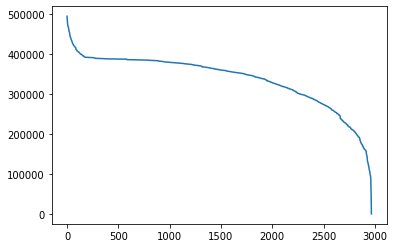

In [117]:
new_sellers.it_costs.plot()

In [108]:
#compute the it costs per seller
n = len(sellers['seller_id'])
x = new_sellers['it_costs'].copy()
for i in range(n-1):
        new_sellers['it_costs_per_seller'][i] = x[i] - x[i+1]
        
new_sellers

/tmp/ipykernel_4635/259429776.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sellers['it_costs_per_seller'][i] = x[i] - x[i+1]


,seller_id,rev,cost_br,n_orders,profits,it_costs,it_costs_per_seller
0,6560211a19b47992c3666cc44a7e94c0,13770.0,35481.0,1854,-21711.0,495335.864453,4586
1,4a3ca9315b744ce9f8e9374361493884,21647.0,39509.0,1806,-17862.0,490749.863302,4371
2,cc419e0650a3c5ba77189a1882b7556a,11949.0,28953.0,1706,-17004.0,486378.079462,2958
3,ea8482cd71df3c1969d7b9473ff13abc,4678.0,20309.0,1146,-15631.0,483419.148956,2448
4,8b321bb669392f5163d04c59e235e066,2554.0,15506.0,943,-12952.0,480970.705119,3668
...,...,...,...,...,...,...,...
2962,46dc3b2cc0980fb8ec44634e21d2718e,14571.0,7587.0,521,6984.0,60151.916198,3560
2963,edb1ef5e36e0c8cd84eb3c9b003e486d,8808.0,1520.0,166,7288.0,56591.449190,14904
2964,fa1c13f2614d7b5c4749cbc52fecda94,21004.0,6555.0,585,14449.0,41686.485139,11746
2965,7e93a43ef30c4f03f38b393420bc753a,19323.0,4714.0,336,14609.0,29940.362661,29940


>> Distribution of IT costs

<AxesSubplot:ylabel='Frequency'>

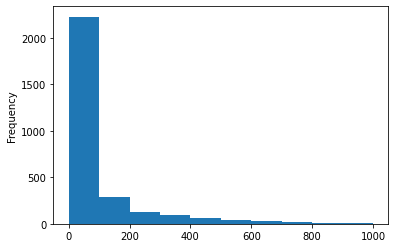

In [109]:
new_sellers.it_costs_per_seller.plot.hist(range=(0,1000))

<AxesSubplot:>

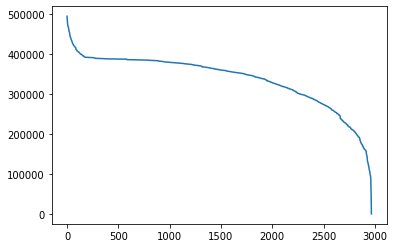

In [110]:
#how IT costs evolve if we remove dealers from the worst dealer to the best dealer
new_sellers['it_costs'].plot()

<AxesSubplot:ylabel='Frequency'>

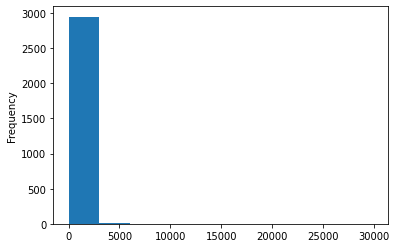

In [111]:
#distribution of it costs across dealers
new_sellers['it_costs_per_seller'].plot.hist()

In [112]:
#update the computation of PNL
new_sellers['p&l'] = new_sellers['profits'] - new_sellers['it_costs_per_seller']

In [113]:
#compute the cum pnl as we will be cutting dealers accesses from the worst to the best
c2 = pd.Series(new_sellers['p&l'])
new_sellers['cum_p&l'] = 0
y=new_sellers['p&l']

for i in range(2967 -1):
    new_sellers['cum_p&l'][i]= y[i:].sum()

new_sellers

/tmp/ipykernel_4635/715541338.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_sellers['cum_p&l'][i]= y[i:].sum()


,seller_id,rev,cost_br,n_orders,profits,it_costs,it_costs_per_seller,p&l,cum_p&l
0,6560211a19b47992c3666cc44a7e94c0,13770.0,35481.0,1854,-21711.0,495335.864453,4586,-26297.0,669580
1,4a3ca9315b744ce9f8e9374361493884,21647.0,39509.0,1806,-17862.0,490749.863302,4371,-22233.0,695877
2,cc419e0650a3c5ba77189a1882b7556a,11949.0,28953.0,1706,-17004.0,486378.079462,2958,-19962.0,718110
3,ea8482cd71df3c1969d7b9473ff13abc,4678.0,20309.0,1146,-15631.0,483419.148956,2448,-18079.0,738072
4,8b321bb669392f5163d04c59e235e066,2554.0,15506.0,943,-12952.0,480970.705119,3668,-16620.0,756151
...,...,...,...,...,...,...,...,...,...
2962,46dc3b2cc0980fb8ec44634e21d2718e,14571.0,7587.0,521,6984.0,60151.916198,3560,3424.0,1219
2963,edb1ef5e36e0c8cd84eb3c9b003e486d,8808.0,1520.0,166,7288.0,56591.449190,14904,-7616.0,-2205
2964,fa1c13f2614d7b5c4749cbc52fecda94,21004.0,6555.0,585,14449.0,41686.485139,11746,2703.0,5411
2965,7e93a43ef30c4f03f38b393420bc753a,19323.0,4714.0,336,14609.0,29940.362661,29940,-15331.0,2708


In [114]:
new_sellers

,seller_id,rev,cost_br,n_orders,profits,it_costs,it_costs_per_seller,p&l,cum_p&l
0,6560211a19b47992c3666cc44a7e94c0,13770.0,35481.0,1854,-21711.0,495335.864453,4586,-26297.0,669580
1,4a3ca9315b744ce9f8e9374361493884,21647.0,39509.0,1806,-17862.0,490749.863302,4371,-22233.0,695877
2,cc419e0650a3c5ba77189a1882b7556a,11949.0,28953.0,1706,-17004.0,486378.079462,2958,-19962.0,718110
3,ea8482cd71df3c1969d7b9473ff13abc,4678.0,20309.0,1146,-15631.0,483419.148956,2448,-18079.0,738072
4,8b321bb669392f5163d04c59e235e066,2554.0,15506.0,943,-12952.0,480970.705119,3668,-16620.0,756151
...,...,...,...,...,...,...,...,...,...
2962,46dc3b2cc0980fb8ec44634e21d2718e,14571.0,7587.0,521,6984.0,60151.916198,3560,3424.0,1219
2963,edb1ef5e36e0c8cd84eb3c9b003e486d,8808.0,1520.0,166,7288.0,56591.449190,14904,-7616.0,-2205
2964,fa1c13f2614d7b5c4749cbc52fecda94,21004.0,6555.0,585,14449.0,41686.485139,11746,2703.0,5411
2965,7e93a43ef30c4f03f38b393420bc753a,19323.0,4714.0,336,14609.0,29940.362661,29940,-15331.0,2708


<AxesSubplot:>

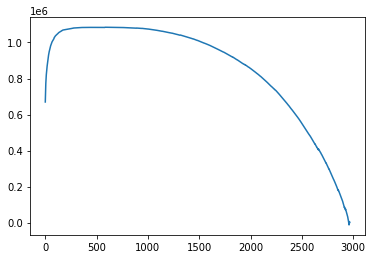

In [115]:
cumpl = new_sellers['cum_p&l']
cumpl.plot()

In [116]:
cumpl.idxmax()

586